# Import the libraries and read the data
# First things first: import all the necessary libraries which are required to implement this strategy.

In [1]:
# We'll be using Sklearn library for this task..
from sklearn.linear_model import LinearRegression 
# pandas and numpy are used for data manipulation 
import pandas as pd 
import numpy as np 
# matplotlib and seaborn are used for plotting graphs 
import matplotlib.pyplot as plt 
import seaborn 
# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf

/opt/anaconda3/lib/python3.8/site-packages/fix_yahoo_finance/__init__.py:0: DeprecationWarning: 

*** `fix_yahoo_finance` was renamed to `yfinance`. ***
Please install and use `yfinance` directly using `pip install yfinance -U`

More information: https://github.com/ranaroussi/yfinance



# Then, we read the past 13 years of daily AAPL price data and store it in Dataframe. We remove the columns which are not relevant and drop NaN values using dropna() function. Then, we plot the AAPL close price.

[*********************100%***********************]  1 of 1 completed


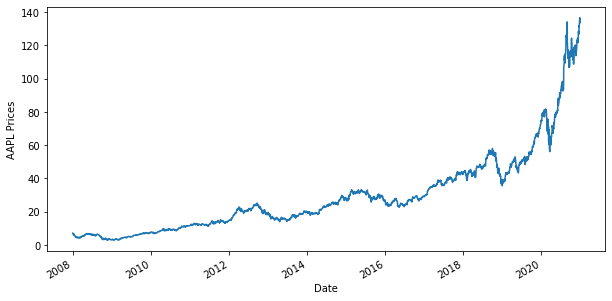

In [2]:
# Read data 
Df = yf.download('AAPL','2008-01-01','2020-12-31')
# Only keep close columns 
Df=Df[['Close']] 
# Drop rows with missing values 
Df= Df.dropna() 
# Plot the closing price of GLD 
Df.Close.plot(figsize=(10,5)) 
plt.ylabel("AAPL Prices")
plt.show()

# Define explanatory variables
# An explanatory variable is a variable that is manipulated to determine the value of the AAPL price the next day. Simply, they are the features which we want to use to predict the AAPL price. The explanatory variables in this strategy are the moving averages for past 3 days and 9 days. We drop the NaN values using dropna() function and store the feature variables in X.

# However, you can add more variables to X which you think are useful to predict the prices of the AAPL. These variables can be technical indicators



In [3]:
Df['S_3'] = Df['Close'].shift(1).rolling(window=3).mean() 
Df['S_9']= Df['Close'].shift(1).rolling(window=9).mean() 
Df= Df.dropna() 
X = Df[['S_3','S_9']] 
X.head()

,S_3,S_9
Date,,
2008-01-14,6.310833,6.535317
2008-01-15,6.303452,6.458730
2008-01-16,6.196548,6.356349
2008-01-17,6.041191,6.216310
2008-01-18,5.828214,6.140278


# Define dependent variable
# Similarly, the dependent variable depends on the values of the explanatory variables. Simply put, it is the AAPL price which we are trying to predict. We store the AAPL price in y.



In [4]:
y = Df['Close']
y.head()

Date
2008-01-14    6.385000
2008-01-15    6.037143
2008-01-16    5.701429
2008-01-17    5.746071
2008-01-18    5.762857
Name: Close, dtype: float64

# Split the data into train and test dataset
# In this step, we split the predictors and output data into train and test data. The training data is used to create the linear regression model, by pairing the input with expected output. The test data is used to estimate how well the model has been trained.

# First 80% of the data is used for training and remaining data for testing
# X_train & y_train are training dataset
# X_test & y_test are test dataset

In [5]:

t=.8 
t = int(t*len(Df)) 
# Train dataset 
X_train = X[:t] 
y_train = y[:t]  
# Test dataset 
X_test = X[t:] 
y_test = y[t:]

# Create a linear regression model
# We will now create a linear regression model. But, what is linear regression?

# If we try to capture a mathematical relationship between ‘x’ and ‘y’ variables that “best” explains the observed values of ‘y’ in terms of observed values of ‘x’ by fitting a line through a scatter plots then such an equation between x and y is called linear regression analysis.

# Y = m1 * X1 + m2 * X2 + C AAPL price = m1 * 3 days moving average + m2 * 15 days moving average + c
# Then we use the fit method to fit the independent and dependent variables (x’s and y’s) to generate coefficient and constant for regression.

In [6]:
linear = LinearRegression().fit(X_train,y_train)

# Predicting the AAPL prices
# Now, it’s time to check if the model works in the test dataset. We predict the AAPL prices using the linear model created using the train dataset. The predict method finds the AAPL price (y) for the given explanatory variable X.

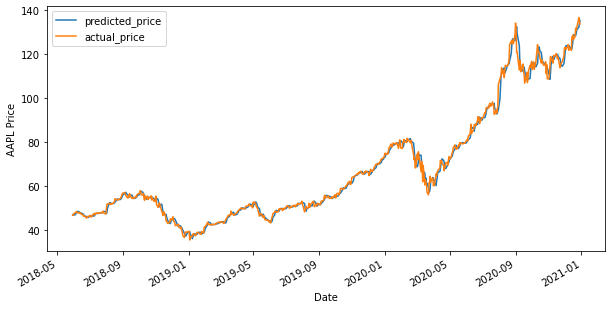

In [7]:
predicted_price = linear.predict(X_test)  
predicted_price = pd.DataFrame(predicted_price,index=y_test.index,columns = ['price'])  
predicted_price.plot(figsize=(10,5))  
y_test.plot()  
plt.legend(['predicted_price','actual_price'])  
plt.ylabel("AAPL Price")  
plt.show()

# Let’s check our accuracy
# Now, let’s compute the goodness of the fit using the score() function.

In [10]:
r2_score = linear.score(X[t:],y[t:])*100
float("{0:.2f}".format(r2_score))

99.42

# As it can be seen, the R-squared of the model is 99.42%. R-squared is always between 0 and 100%. A score close to 100% indicates that the model explains the AAPL prices well.